In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Завантаження Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


In [4]:
model = models.Sequential([
    layers.Conv2D(
        32, (3, 3),
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001),
        input_shape=(28, 28, 1)
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(
        64, (3, 3),
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.6061 - loss: 1.2871 - val_accuracy: 0.8086 - val_loss: 0.6765
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 120ms/step - accuracy: 0.7961 - loss: 0.7138 - val_accuracy: 0.8453 - val_loss: 0.5696
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.8216 - loss: 0.6230 - val_accuracy: 0.8543 - val_loss: 0.5208
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step - accuracy: 0.8339 - loss: 0.5819 - val_accuracy: 0.8692 - val_loss: 0.4839
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.8395 - loss: 0.5578 - val_accuracy: 0.8727 - val_loss: 0.4651
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.8467 - loss: 0.5331 - val_accuracy: 0.8706 - val_loss: 0.4684
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.8544 - loss: 0.5203 - val_accuracy: 0.8749 - val_loss: 0.4495
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 128ms/step - accuracy: 0.8587 - loss: 0

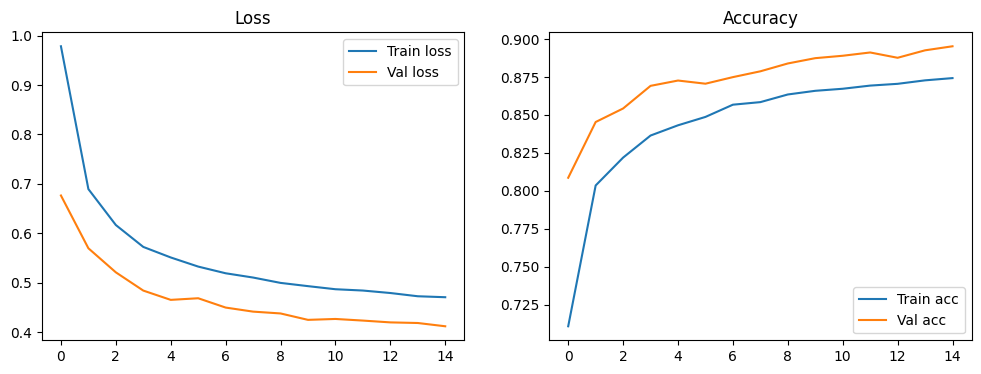

In [7]:
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title('Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Accuracy')

plt.show()


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8940 - loss: 0.4268
Test accuracy: 0.8905


In [9]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


In [11]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


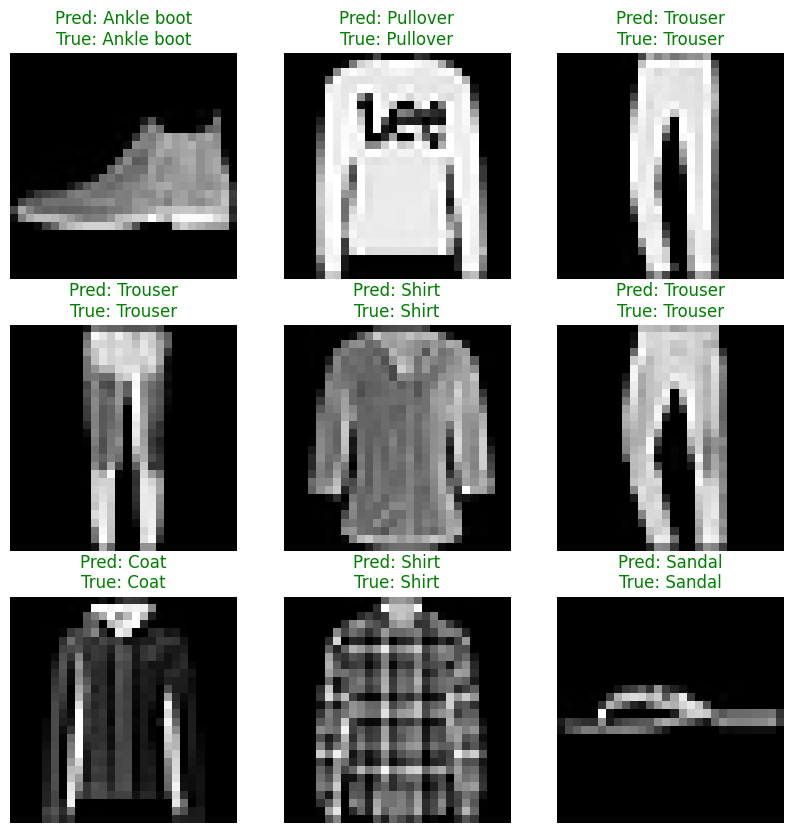

In [12]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')

    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]

    color = 'green' if pred_label == true_label else 'red'

    plt.title(
        f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}",
        color=color
    )
    plt.axis('off')

plt.show()
